In [51]:
import pandas as pd

In [52]:
df= pd.read_csv("netflix_titles.csv")

In [53]:
print(df.shape)

(8807, 12)


In [54]:
print(df.describe(include="all"))

       show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top     David Attenborough 

In [55]:
print(df.iloc[0:10].to_string())

  show_id     type                             title                       director                                                                                                                                                                                                                                                                                                             cast                                                                country          date_added  release_year rating   duration                                                      listed_in                                                                                                                                                description
0      s1    Movie              Dick Johnson Is Dead                Kirsten Johnson                                                                                                                                                                                           

In [56]:
print(df.info)

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [57]:
#I am removing all the duplicates and printing all the non-duplicates(all)

dup= df["show_id"].drop_duplicates()

print(dup)

0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
8802    s8803
8803    s8804
8804    s8805
8805    s8806
8806    s8807
Name: show_id, Length: 8807, dtype: object


In [58]:
df= df.drop(columns=["description"])

print(df.head(10))

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theod

In [59]:
#printing number of null values in each column

print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64


In [60]:
#replacing the values accordingly

df= df.fillna({"country": "Unknown"})

df= df.fillna({"director": "No Director Listed"})

In [61]:
# For movies, taking the first string of cell and converting it to float(90 minutes becomes 90)
df["duration_minutes"] = df["duration"].where(df["type"] == "Movie").str.split().str[0].astype(float)

# doing the same for tv shows
df["seasons"]= df["duration"].where(df["type"]=="TV Show").str.split().str[0].astype(float)

print(df.head(10))

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1             No Director Listed   
2                Julien Leclercq   
3             No Director Listed   
4             No Director Listed   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theod

In [62]:
df["Is_Recent"] = (df["release_year"] > 2015).astype(int)

print(df.head(10))

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1             No Director Listed   
2                Julien Leclercq   
3             No Director Listed   
4             No Director Listed   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theod

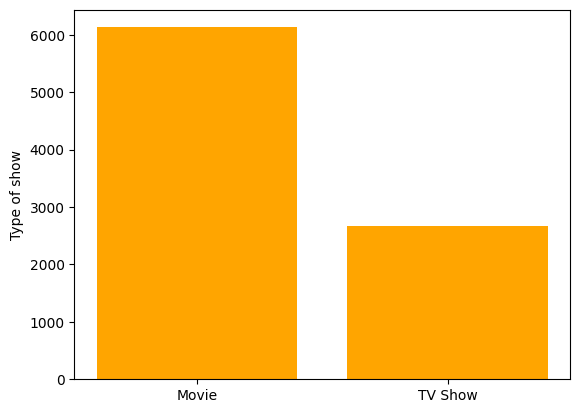

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv("netflix_titles.csv")

#reading the 'type' coloumn form data set, setting x value as the item occouring inside the type coloumn, and y axis as the number of time it occours in the said coloumn

countplot= df["type"].value_counts()

plt.ylabel("Type of show")

plt.bar(countplot.index, countplot.values, color= "orange")

plt.show()

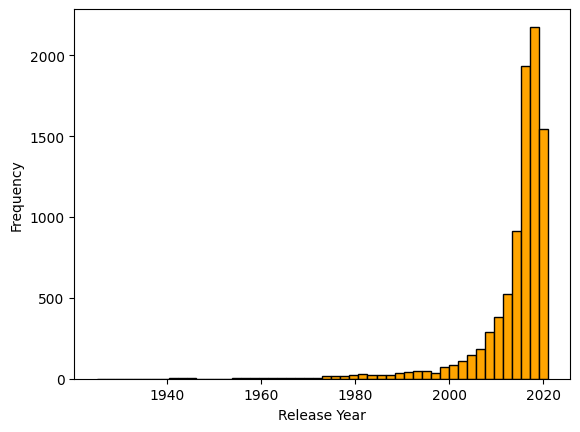

In [64]:
#plotting a histogram of the relase year

plt.hist(df["release_year"], bins=50, color="orange",edgecolor= "black")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()

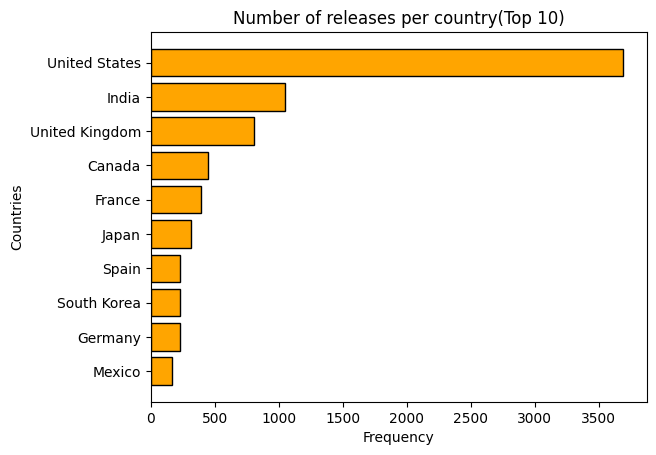

In [65]:
countries = (df["country"].str.split(", ").explode())  #some movies have many countries listed in their "country" coloumn, i am seperating each country and making it a new row

countplot= countries.value_counts().head(10).sort_values()  #printing top 10 in ascending order

plt.ylabel("Countries")

plt.xlabel("Frequency")

plt.title("Number of releases per country(Top 10)")

plt.barh(countplot.index, countplot.values, color= "orange", edgecolor="black")

plt.show()

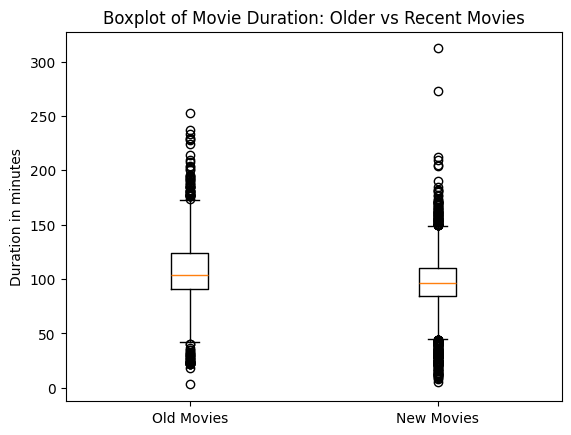

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")

df["Is_Recent"] = (df["release_year"] >= 2015).astype(int)

df["duration_minutes"] = df["duration"].where(df["type"] == "Movie").str.split().str[0].astype(float)

oldmovies = df[df["Is_Recent"] == 0]["duration_minutes"].dropna()
newmovies = df[df["Is_Recent"] == 1]["duration_minutes"].dropna()  #removing Nan values

plt.boxplot([oldmovies, newmovies],tick_labels=["Old Movies", "New Movies"])

plt.ylabel("Duration in minutes")
plt.title("Boxplot of Movie Duration: Older vs Recent Movies")

plt.show()